This is a demo file that I had prepared for the benchmarking with Francois Nunio of CEA

In [1]:
import pancakes_field_calculator_final as pc
import rules_of_mixtures_transversely_isotropic as rm
import gps_analysis_orthotropic_cylinders as gaoc

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#mpl.style.use('gianstyle.mplstyle')
mm = 1e-3
mum = 1e-6
MPa = 1e6
GPa = MPa*1e3

In [3]:
# tape parameters
I = 1500
tape_w = 12*mm      # tape width (axially)

# thicknesses are TOTAL (accounting for multiple layers)
theva = {'Cu': {'E': 110*GPa, 'nu': 0.31, 'thick': 40*mum, 'G' : 42*GPa},
        'ReBCO': {'E': 157*GPa, 'nu': 0.33, 'thick': 3*mum, 'G': 59*GPa},
        'SS': {'E': 208*GPa, 'nu': 0.3, 'thick': 50*mum, 'G': 80*GPa}
        }

# coil parameters
Rin = 30*mm         # winding internal radius
Nturns = 600       # number of turns per pancake

# magnet parameters
Npancakes = 1
gap = 2*mm          # Axial gap between pancakes

# Source points
v_divi = 36          # number of field source points in tape width
h_divi = 600         # number of horizontal source points         

# grid calculation points
Nx = 50
Ny = 50
# line calc. points
pti_line = 30

In [4]:
thicknesses = np.array([])
moduli = np.array([])
Gi = np.array([])
nui = np.array([])

for mat, prop in theva.items():
    thicknesses = np.append(thicknesses, prop['thick'])
    moduli = np.append(moduli, prop['E'])
    Gi = np.append(Gi, prop['G'])
    nui = np.append(nui, prop['nu'])
    
print(thicknesses, moduli, Gi, nui)

tape_t = np.sum(thicknesses)
Je = I/tape_w/tape_t*mm*mm

[4.e-05 3.e-06 5.e-05] [1.10e+11 1.57e+11 2.08e+11] [4.2e+10 5.9e+10 8.0e+10] [0.31 0.33 0.3 ]


In [5]:
solu = pc.field_calc(Npancakes, Nturns, gap, Je, tape_w, tape_t, Rin, v_divi, h_divi, Nx, Ny, pti_line, calculate_grid = 0)
r_sour, z_sour, R, Z, Br, Bz, Bint, ind, r_c_lines, z_c_lines, pp, Br_lines, Bz_lines, Bint_lines = solu

Grid sources:  21600
Grid calc. points:  2500
Inductance of c.a.: 37.487  mH
Stored magnetic energy: 42.173  kJ
Peak field of:  17.27  T
Axial bore field of c.a.:  0.0  T
Pancake n. 1, B0: 29.9 T, C0: 421.0 T/m

 Calculation completed.


In [6]:
# pc.intensity_plot(Npancakes, Nturns, Je, Rin, tape_w, tape_t, gap, R,Z, Br, Bz, [6,3], figdpi = 100)
# plt.show()

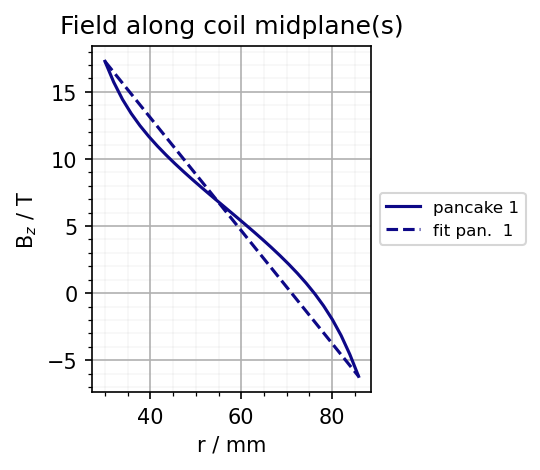

In [7]:
pc.midplanes_plot(Npancakes, pp, r_c_lines, z_c_lines, Br_lines, Bz_lines, figsiz = [3,3], figdpi = 150)
plt.show()

In [8]:
# Mechanical calculations. Module: rm
Er = rm.Ez(thicknesses, moduli)
Eth = rm.Ex(thicknesses, moduli)
Ez = Eth

Gthz = rm.Gxy(thicknesses, Gi)
Gthr = rm.Gxz(thicknesses, Gi)
Gzr = Gthr

nuthr = rm.nuxz(thicknesses, nui)
nuthz = rm.nuxy(thicknesses, nui, moduli)

Cc, Sc = rm.C_S_rthz(Er, Eth, nuthr, nuthz, Gthr, Gthz)

Crr = Cc[0,0]
Crth = Cc[0,1]
Crz = Cc[0,2]
Cthth = Cc[1,1]
Cthz = Cc[1,2]
Czz = Cc[2,2]

kk1 = np.sqrt(Cthth/Crr)

In [9]:
# Analysis of a solenoid. Module: gaoc
# I suppose to add a new ring made of steel.
#Cring, Sring = rm.C_S_rthz(208*GPa, 208*GPa, 0.3, 0.3, 208*GPa/2.6, 208*GPa/2.6)
Cring, Sring = rm.C_S_rthz(1, 1, 0.3, 0.3, 1/2.6, 1/2.6)
kkring = np.sqrt(Cring[1,1]/Cring[0,0])

ac = Rin
bc = Rin+Nturns*tape_t

ar = bc
br = bc+0.2*mm

coil1 = {'a' : ac, 'b': bc, 'J':Je/mm/mm, 'B0': pp[Npancakes//2, 1], 'C0': -pp[Npancakes//2, 0], 'C': Cc}
ring = {'a': ar, 'b': br, 'J': 0.0, 'B0': 0.0, 'C0': 0.0, 'C': Cring, 'divi': 10}

matrix assembled


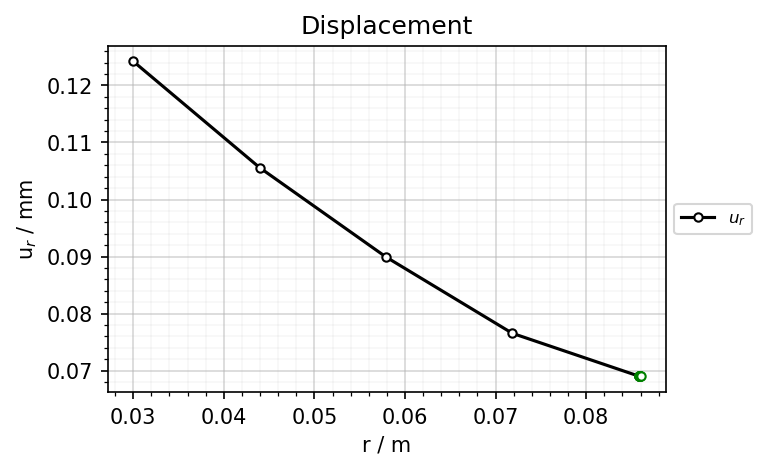

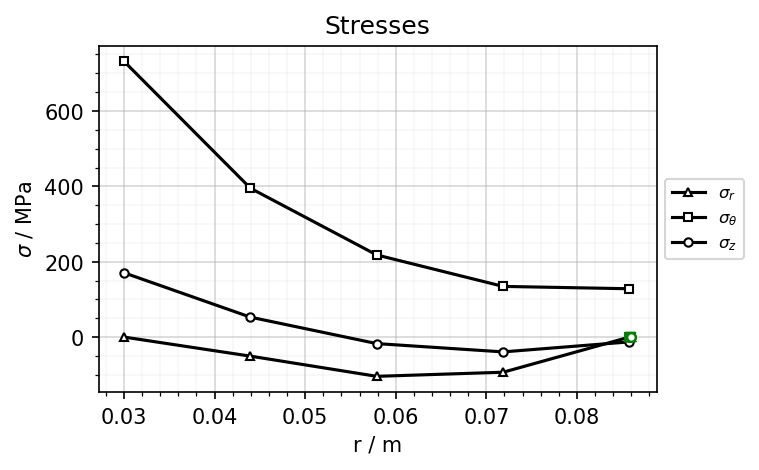

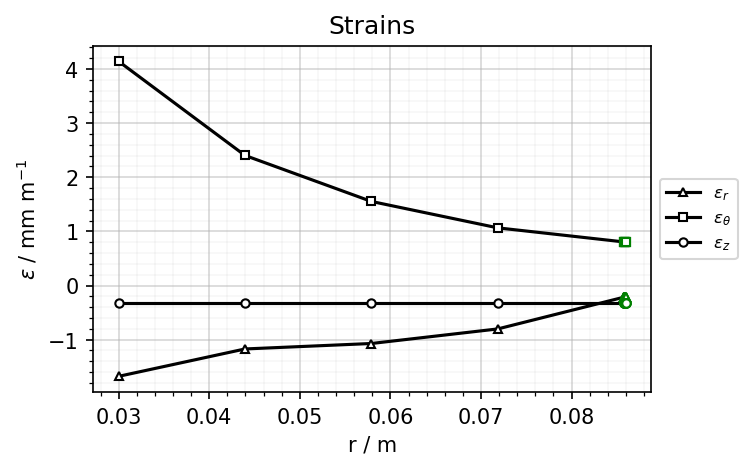

In [10]:
layers = [coil1, ring]

matrix, values = gaoc.assemble_problem(layers)

sol = np.linalg.solve(matrix,values)
gaoc.plot_results(layers, sol)
plt.show()

In [11]:
# TAPE PARAMETERS
I = 1500
tape_w = 12*mm      # tape width (axially)
# thicknesses are TOTAL
theva = {'Cu': {'E': 110*GPa, 'nu': 0.31, 'thick': 40*mum, 'G' : 42*GPa},
        'ReBCO': {'E': 157*GPa, 'nu': 0.33, 'thick': 3*mum, 'G': 59*GPa},
        'SS': {'E': 208*GPa, 'nu': 0.3, 'thick': 50*mum, 'G': 80*GPa}
        }

# coil parameters
Rin = 30*mm         # winding internal radius
Nturns = 600       # number of turns per pancake

# magnet parameters
Npancakes = 3
gap = 2*mm          # Axial gap between pancakes

# mechanical configuration
w_ring = 20*mm

Ering = 208*GPa
nuring = 0.3
Gring = Ering/(2*(1+nuring))

In [12]:
# Source points
v_divi = 36          # number of field source points in tape width
h_divi = 600         # number of horizontal source points         

# grid calculation points
Nx = 50
Ny = 50
# line calc. points
pti_line = 30

thicknesses = np.array([])
moduli = np.array([])
Gi = np.array([])
nui = np.array([])

for mat, prop in theva.items():
    thicknesses = np.append(thicknesses, prop['thick'])
    moduli = np.append(moduli, prop['E'])
    Gi = np.append(Gi, prop['G'])
    nui = np.append(nui, prop['nu'])
    
print(thicknesses, moduli, Gi, nui)

tape_t = np.sum(thicknesses)
Je = I/tape_w/tape_t*mm*mm

# Mechanical calculations. Module: rm
Er = rm.Ez(thicknesses, moduli)
Eth = rm.Ex(thicknesses, moduli)
Ez = Eth

Gthz = rm.Gxy(thicknesses, Gi)
Gthr = rm.Gxz(thicknesses, Gi)
Gzr = Gthr

nuthr = rm.nuxz(thicknesses, nui)
nuthz = rm.nuxy(thicknesses, nui, moduli)

Cc, Sc = rm.C_S_rthz(Er, Eth, nuthr, nuthz, Gthr, Gthz)

Crr = Cc[0,0]
Crth = Cc[0,1]
Crz = Cc[0,2]
Cthth = Cc[1,1]
Cthz = Cc[1,2]
Czz = Cc[2,2]

kk1 = np.sqrt(Cthth/Crr)

Cring, Sring = rm.C_S_rthz(Ering, Ering, nuring, nuring, Gring, Gring)
kkring = np.sqrt(Cring[1,1]/Cring[0,0])

# coil radii
ac = Rin
bc = Rin+Nturns*tape_t

# ring radii
ar = bc
br = bc+w_ring

[4.e-05 3.e-06 5.e-05] [1.10e+11 1.57e+11 2.08e+11] [4.2e+10 5.9e+10 8.0e+10] [0.31 0.33 0.3 ]


In [13]:
solu_field = pc.field_calc(Npancakes, Nturns, gap, Je, tape_w, tape_t, Rin, v_divi, h_divi, Nx, Ny, pti_line, calculate_grid = 0)
r_sour, z_sour, R, Z, Br, Bz, Bint, ind, r_c_lines, z_c_lines, pp, Br_lines, Bz_lines, Bint_lines = solu_field

Grid sources:  64800
Grid calc. points:  2500
Inductance of c.a.: 265.295  mH
Stored magnetic energy: 298.456  kJ
Peak field of:  36.76  T
Axial bore field of c.a.:  0.0  T
Pancake n. 1, B0: 54.0 T, C0: 715.0 T/m
Pancake n. 2, B0: 61.1 T, C0: 812.0 T/m
Pancake n. 3, B0: 54.0 T, C0: 715.0 T/m

 Calculation completed.


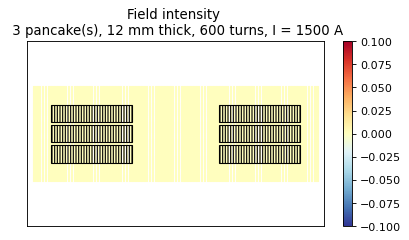

In [14]:
pc.intensity_plot(Npancakes, Nturns, Je, Rin, tape_w, tape_t, gap, R,Z, Br, Bz, [6,3], figdpi = 80)
plt.show()

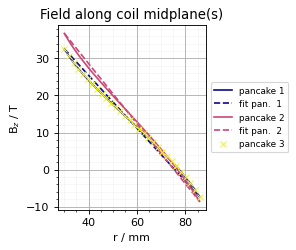

In [15]:
pc.midplanes_plot(Npancakes, pp, r_c_lines, z_c_lines, Br_lines, Bz_lines, figsiz = [3,3], figdpi = 80)
plt.show()

matrix assembled


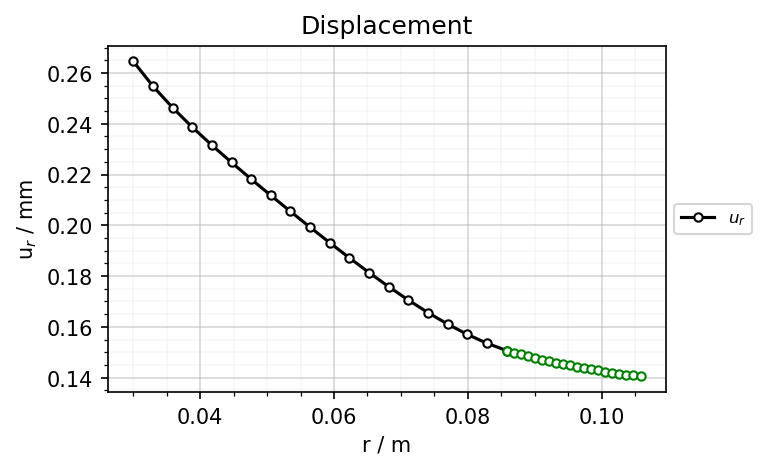

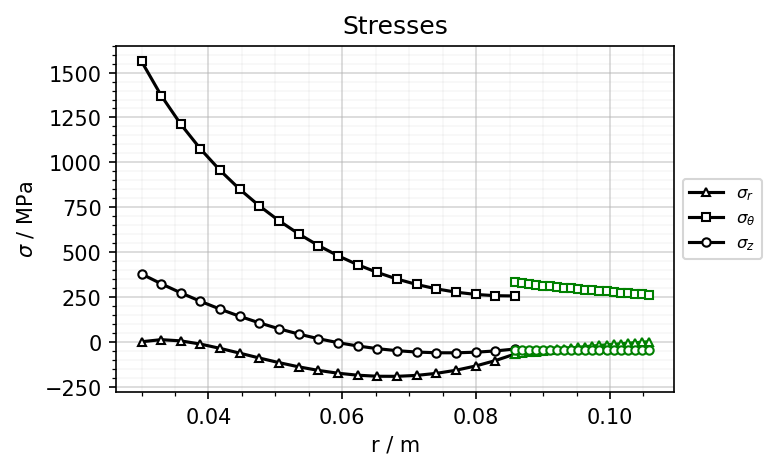

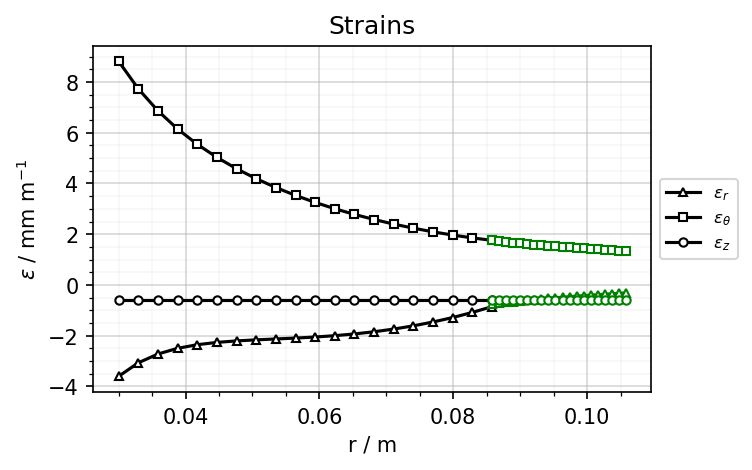

In [16]:
pancake_n = Npancakes//2  # pancake to analyze (starting numbering from the bottom). 
B0n = pp[pancake_n-1, 1]
C0n = -pp[pancake_n-1, 0]

coil1 = {'a' : ac, 'b': bc, 'J':Je/mm/mm, 'B0': B0n, 'C0': C0n, 'C': Cc,  'divi': 20}
ring = {'a': ar, 'b': br, 'J': 0.0, 'B0': 0.0, 'C0': 0.0, 'C': Cring, 'divi': 20}
layers = [coil1, ring]

matrix, values = gaoc.assemble_problem(layers)

sol = np.linalg.solve(matrix,values)
gaoc.plot_results(layers, sol)
plt.show()

# Exploring different ring widths

matrix assembled
matrix assembled
matrix assembled
matrix assembled
matrix assembled


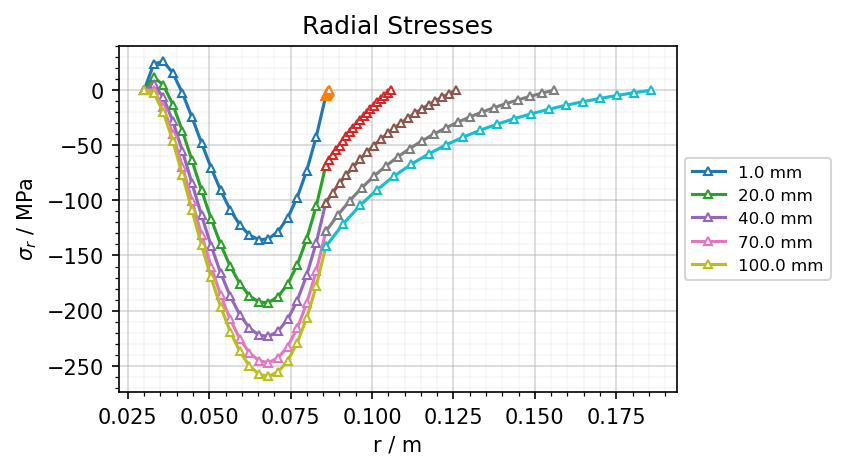

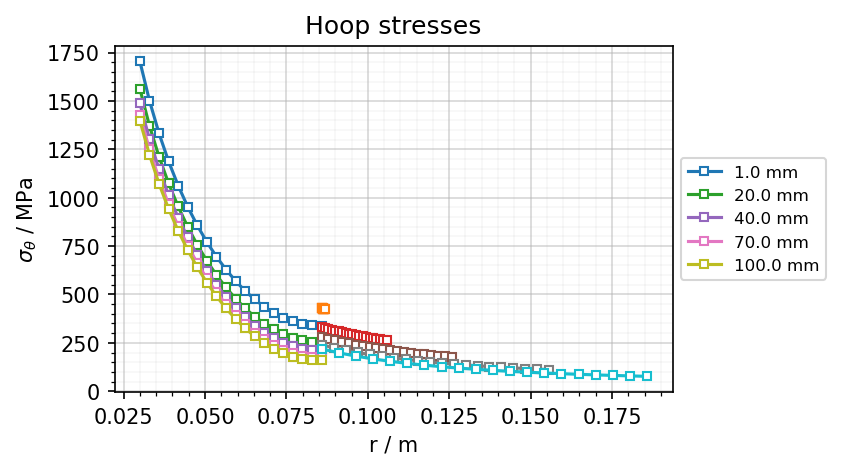

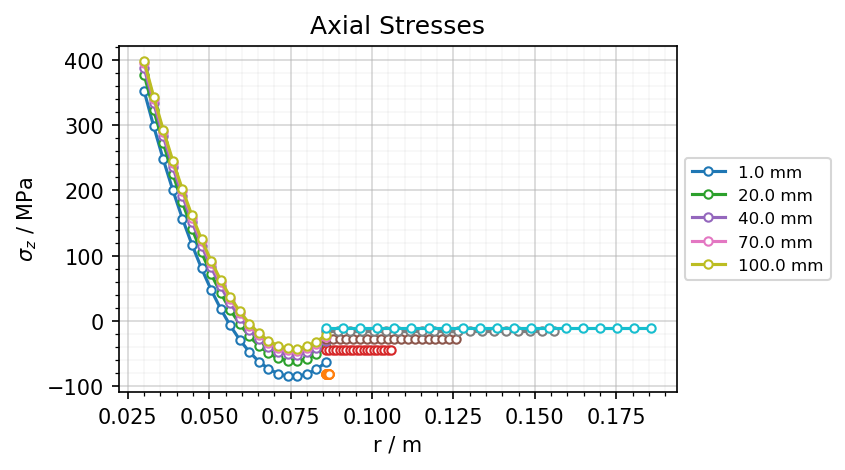

In [17]:
widths = [1*mm, 20*mm, 40*mm, 70*mm, 100*mm]

fig1, ax1 = plt.subplots(figsize = [6,3], dpi = 150)
fig2, ax2 = plt.subplots(figsize = [6,3], dpi = 150)
fig3, ax3 = plt.subplots(figsize = [6,3], dpi = 150)

axs = [ax1, ax2, ax3]

for i, wi in enumerate(widths):
    ring = {'a': ar, 'b': ar+wi, 'J': 0.0, 'B0': 0.0, 'C0': 0.0, 'C': Cring, 'divi': 20}
    layers = [coil1, ring]

    matrix, values = gaoc.assemble_problem(layers)
    sol = np.linalg.solve(matrix,values)
    gaoc.plot_stresses(axs, layers, sol, str(np.round(wi/mm)) + ' mm')

ax1.set_title('Radial Stresses')
ax1.set_xlabel('r / m')
ax1.set_ylabel(r'$\sigma_r$ / MPa')
ax1.grid(visible=True, which='minor', axis='both', alpha = 0.1)
ax1.grid(visible=True, which='major', axis='both', alpha = 0.5)
ax1.minorticks_on()
box1 = ax1.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.8, box1.height])
ax1.legend(fontsize = 8, loc='center left', bbox_to_anchor=(1, 0.5))

ax2.set_title('Hoop stresses')
ax2.set_xlabel('r / m')
ax2.set_ylabel(r'$\sigma_\theta$ / MPa')
ax2.grid(visible=True, which='minor', axis='both', alpha = 0.1)
ax2.grid(visible=True, which='major', axis='both', alpha = 0.5)
ax2.minorticks_on()
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])
ax2.legend(fontsize = 8, loc='center left', bbox_to_anchor=(1, 0.5))

ax3.set_title('Axial Stresses')
ax3.set_xlabel('r / m')
ax3.set_ylabel(r'$\sigma_z$ / MPa')
ax3.grid(visible=True, which='minor', axis='both', alpha = 0.1)
ax3.grid(visible=True, which='major', axis='both', alpha = 0.5)
ax3.minorticks_on()
box3 = ax3.get_position()
ax3.set_position([box3.x0, box3.y0, box3.width * 0.8, box3.height])
ax3.legend(fontsize = 8, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()